**imports**
1. paste defaults % 3 - _ext auto inline
2. import libraries - main_maloy_vision*
3. path of all files
    3.1 path untar_data
    3.2 ls
    3.3 path to needed files
    3.4 tfms get_
    3.5 fnames get_ check names
    3.6 check one image > img > .show

**making the dataset**
4. Making the dataset
    4.0 import add libs
    4.1 create 4 folders
    4.2 copy .txt > .csv 
    4.3 copy .csv > files 
    4.4 data = 
        4.4.0 Image from csv
        4.4.1 data = path # main path folder
        4.4.2 size        # size of picture
        4.4.3 ds_tfms     # transformations
        4.4.4 bs          # batchsize
        4.4.5 test        # path of test folder
        4.4.6 normalize   # (image)
    4.5 show_batch
        4.5.1 rows
        4.5.2 figsize=(1,1)
    4.6 check number of classes len(data.classes)
     
**Train**
5. learn - learner
    5.1 cnn?
    5.2 data
    5.3 arch . 
    5.4 metrics=error_rate
    
6. learn.fit_1 \wo \ save

**Interpretation**
7. interp.plot_top_losses \ confusion matrix \ most_confused \ learn.show_results
    7.1 interp = Classif... .from
    7.2 interp.plot_top
    7.3 plot_confusion
    7.4 most_conf
    7.5 show_results

**Relearn**
8. unfreeze \ fit \ lr_find \ fit
    8.1 unfr
    8.3 lr_find
    8.4 fit cool

In [1]:
# 1. paste defaults % 3 - _ext auto inline
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# 2. import libraries - main_maloy_vision*
import torch
import fastai
from fastai.vision import *

import os
import shutil

In [3]:
# 3.1 path
path = Path('D:\\python\\PyProjects\\fast.ai\\projects\\exam_2_sealions')

# download images
1. go -> images.google.com
2. search for pictures
3. ctrl+shift+i paste ->

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl')); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

4. save as file = 'urls_hare.csv'
5. put the file to -> path = Path('data/rabbit-hare')

In [7]:
path.ls()

[WindowsPath('D:/python/PyProjects/fast.ai/projects/exam_2_sealions/urls_seal.csv'),
 WindowsPath('D:/python/PyProjects/fast.ai/projects/exam_2_sealions/urls_sealions.csv')]

## 0x
1. folder = 'hare'
2. file = 'urls_hare.csv
3. dest = path/folder
4. dest.mkdir(parents=True, exist_ok=True)
5. download_images(path/file, dest, max_pics=800)
6. classes > verify_images(path/c, delete=True, max_size=2000)

In [8]:
folder = 'seal'
file = 'urls_seal.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=2000)

In [12]:
folder = 'sealion'
file = 'urls_sealion.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=2000)

In [14]:
classes = ['seal', 'sealion']
for c in classes:
    verify_images(path/c, delete=True, max_size=2000)

4. data = 
        5. Image from csv
        6. data = path # main path folder
        7. size        # size of picture
        8. ds_tfms     # transformations
        9. bs          # batchsize
        10. test        # path of test folder
        11. normalize   # (image)
        
        12. from_folder(path, train. , valid_%, ds_tfms, size, num_workers  ... normalize

In [4]:
data = ImageDataBunch.from_folder(path,
                                 train='.',
                                 valid_pct=0.2,
                                 seed=42,
                                 ds_tfms=get_transforms(),
                                 size=224,
                                 bs=16,
                                 num_workers=4).normalize(imagenet_stats)

    4.5 show_batch
        * rows
        * figsize=(1,1)
    4.6 check number of classes len(data.classes)

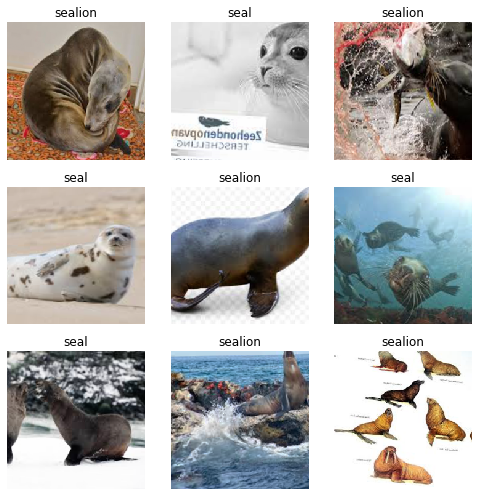

In [19]:
data.show_batch(rows=3, figsize=(7,7))

In [21]:
print(data.c)
print(len(data.classes))

2
2


**Train**
5. learn - learner
    * cnn?
    * data
    * arch . 
    * metrics=error_rate

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [6]:
# 6. learn.fit_1 \wo \ save
learn.fit_one_cycle(4)

In [7]:
learn.save('stage-1-50')

In [6]:
learn.load('stage-1-50');

In [7]:
learn.unfreeze()

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


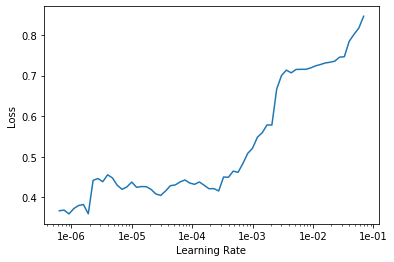

In [9]:
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


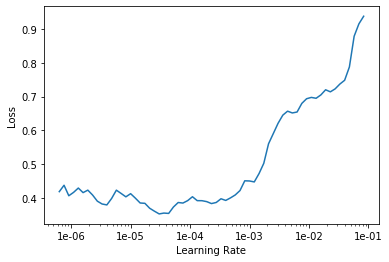

In [10]:
learn.load('stage-1-50');
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5, 5e-4))

In [13]:
learn.save('stage-2-50')

In [8]:
learn.load('stage-2-50');

**Interpretation**
* interp.plot_top_losses \ confusion matrix \ most_confused \ learn.show_results
* interp = Classif... .from
* interp.plot_top
* plot_confusion
* most_conf
* show_results

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

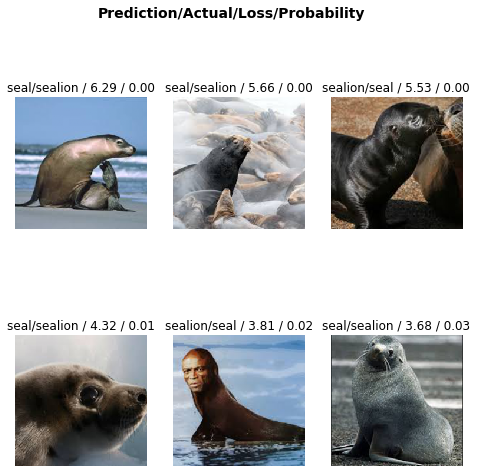

In [13]:
interp.plot_top_losses(6, figsize=(8,8))

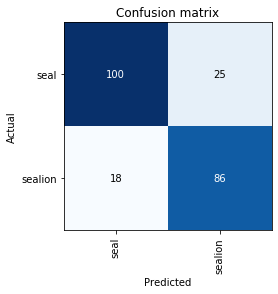

In [15]:
interp.plot_confusion_matrix()

In [17]:
interp.most_confused()

[('seal', 'sealion', 25), ('sealion', 'seal', 18)]

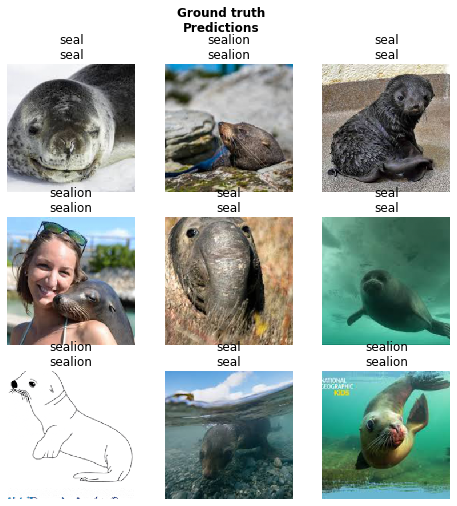

In [20]:
learn.show_results(rows=3, figsize=(8,8))

### Cleaning up
1. from fastai.widgets import *
2. new db = imageList.from_folder  path, split, label_from_fo, transform, size, databunch 
3. learn_cln = cnn...etc
4. learn_cln.load
5. ds, idxs = DatasetFormatter().from_toplosses(learn_cln)
6. ImageCleaner(ds, idxs, path)
7. ds, idxs = DatasetFormatter().from_similars(learn_cln)
8. ImageCleaner(ds, idxs, path, duplicates=True)

In [21]:
from fastai.widgets import *

In [25]:
db = (ImageList.from_folder(path)
      .split_none()
      .label_from_folder()
      .transform(get_transforms(), size=224)
      .databunch()
     )

In [27]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

In [29]:
learn_cln.load('stage-2-50');

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [31]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [32]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [33]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

recreate databunch
4. data = 
        5. Image from csv
        6. data = path # main path folder
        7. size        # size of picture
        8. ds_tfms     # transformations
        9. bs          # batchsize
        10. test        # path of test folder
        11. normalize   # (image)
        
        12. from_folder(path, train. , valid_%, ds_tfms, size, num_workers  ... normalize

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import torch
import fastai
from fastai.vision import *

import os
import shutil
path = Path('D:\\python\\PyProjects\\fast.ai\\projects\\exam_2_sealions')

In [3]:
data = ImageDataBunch.from_csv(path,
                               folder=".",
                               valid_pct=0.2,
                               csv_labels='cleaned.csv',
                               ds_tfms=get_transforms(),
                               size=224, 
                               num_workers=4).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [4]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-5, 5e-4))

In [6]:
learn.save('stage-3-50')

In [5]:
learn.export()

sealion 99%


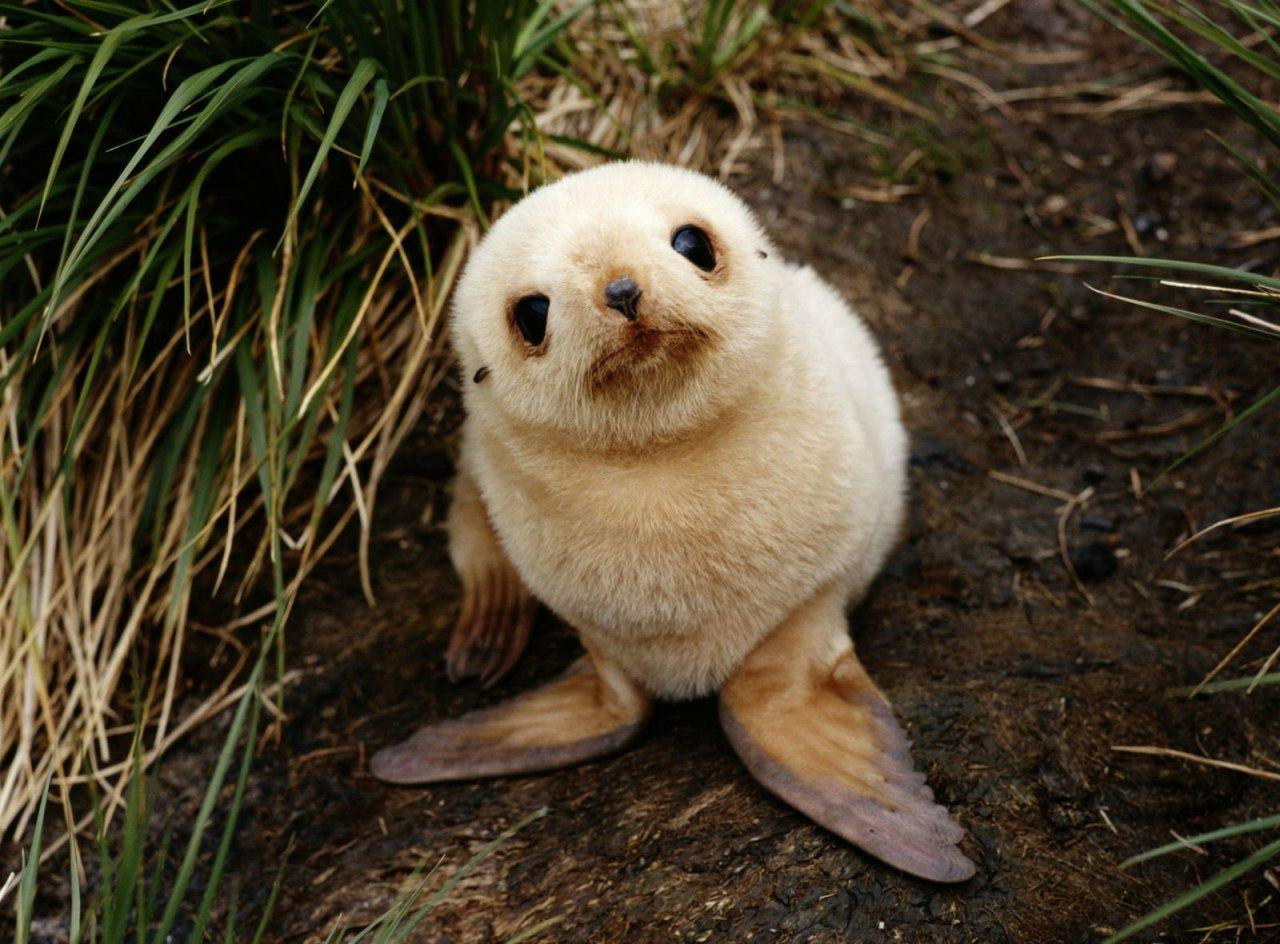

In [17]:
img = open_image(path/'check'/'k1.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img

seal 98%


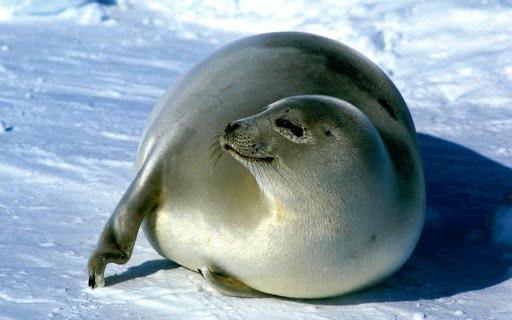

In [18]:
img = open_image(path/'check'/'k2.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img

seal 84%


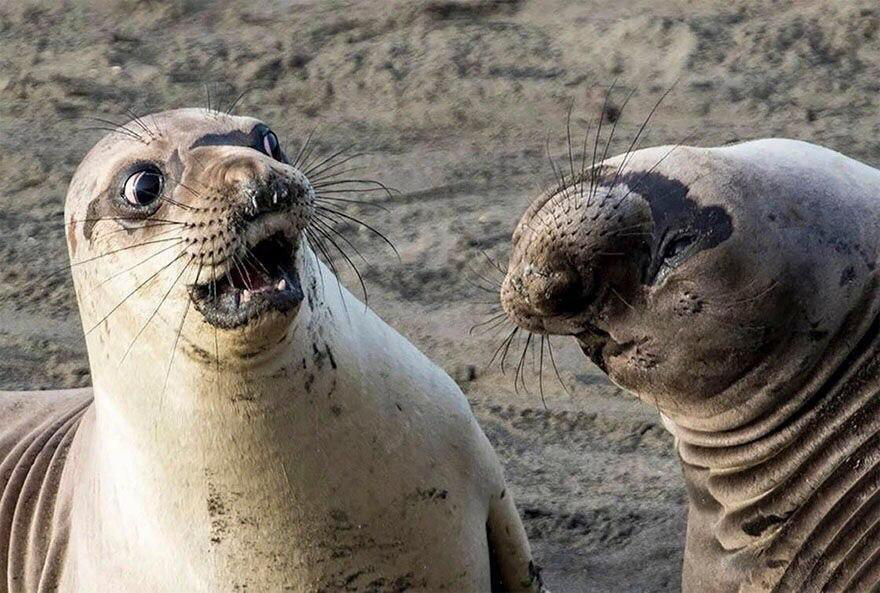

In [21]:
img = open_image(path/'check'/'k5.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img

seal 80%


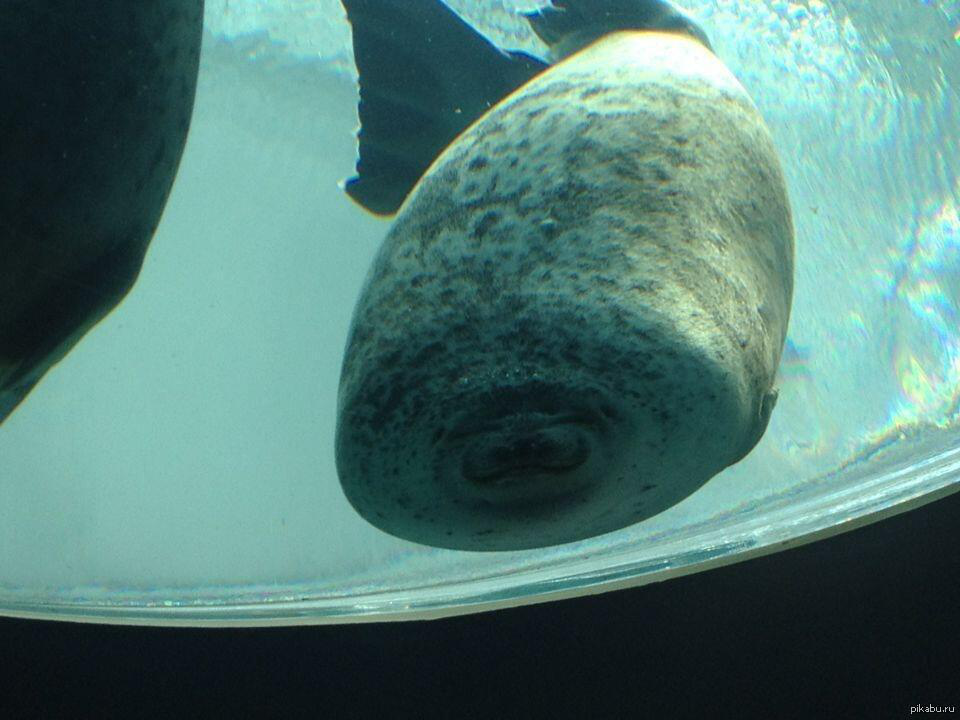

In [23]:
img = open_image(path/'check'/'z1.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img